# Graph loading

Different methods of loading (batched) graph tensors for keras model in- and output.

In [1]:
import keras as ks

In [2]:
import numpy as np
from kgcnn.literature.GIN import make_model_edge as make_model
from kgcnn.utils.plots  import plot_train_test_loss

In [3]:
from kgcnn.data.datasets.FreeSolvDataset import FreeSolvDataset
dataset = FreeSolvDataset()

INFO:kgcnn.data.download:Checking and possibly downloading dataset with name FreeSolv
INFO:kgcnn.data.download:Dataset directory located at C:\Users\patri\.kgcnn\datasets
INFO:kgcnn.data.download:Dataset directory found. Done.
INFO:kgcnn.data.download:Dataset found. Done.
INFO:kgcnn.data.FreeSolv:Found SDF C:\Users\patri\.kgcnn\datasets\FreeSolv\SAMPL.sdf of pre-computed structures.
INFO:kgcnn.data.FreeSolv:Read molecules from mol-file.
INFO:kgcnn.data.FreeSolv: ... process molecules 0 from 642
INFO:kgcnn.molecule.encoder:OneHotEncoder Symbol found ['C', 'N', 'O', 'S', 'Cl', 'Br', 'P', 'F', 'I']
INFO:kgcnn.molecule.encoder:OneHotEncoder Hybridization found [rdkit.Chem.rdchem.HybridizationType.SP3, rdkit.Chem.rdchem.HybridizationType.SP2, rdkit.Chem.rdchem.HybridizationType.SP]
INFO:kgcnn.molecule.encoder:OneHotEncoder TotalDegree found [4, 3, 1, 2]
INFO:kgcnn.molecule.encoder:OneHotEncoder TotalNumHs found [3, 0, 1, 2, 4]
INFO:kgcnn.molecule.encoder:OneHotEncoder CIPCode found [None, '

## 1. Padded tensor

In [4]:
inputs = [
    {"shape": (None, 41), "name": "node_attributes", "dtype": "float32"},
    {"shape": (None, 11), "name": "edge_attributes", "dtype": "float32"},
    {"shape": (None, 2), "name": "edge_indices", "dtype": "int64"},
    {"shape": (), "name": "total_nodes", "dtype": "int64"},  # Or mask
    {"shape": (), "name": "total_edges", "dtype": "int64"},  # Or mask
]
outputs = {"shape": (1, ), "name": "graph_labels", "dtype": "float32"}

In [5]:
model = make_model(
    inputs=inputs,
    input_tensor_type="padded",
    output_mlp={"units": 1, "activation": "linear"}
)
model.compile(loss="mean_absolute_error")

INFO:kgcnn.models.utils:Updated model kwargs: '{'name': 'GINE', 'inputs': [{'shape': (None, 41), 'name': 'node_attributes', 'dtype': 'float32'}, {'shape': (None, 11), 'name': 'edge_attributes', 'dtype': 'float32'}, {'shape': (None, 2), 'name': 'edge_indices', 'dtype': 'int64'}, {'shape': (), 'name': 'total_nodes', 'dtype': 'int64'}, {'shape': (), 'name': 'total_edges', 'dtype': 'int64'}], 'input_tensor_type': 'padded', 'cast_disjoint_kwargs': {}, 'input_embedding': None, 'input_node_embedding': {'input_dim': 95, 'output_dim': 64}, 'input_edge_embedding': {'input_dim': 10, 'output_dim': 64}, 'gin_mlp': {'units': [64, 64], 'use_bias': True, 'activation': ['relu', 'linear'], 'use_normalization': True, 'normalization_technique': 'graph_batch'}, 'gin_args': {'epsilon_learnable': False}, 'depth': 3, 'dropout': 0.0, 'verbose': 10, 'last_mlp': {'use_bias': [True, True, True], 'units': [64, 64, 64], 'activation': ['relu', 'relu', 'linear']}, 'output_embedding': 'graph', 'output_to_tensor': None

In [6]:
dataset.map_list(method="count_nodes_and_edges")
dataset.clean(inputs)
for i in range(len(dataset)):
    dataset[i]["graph_labels"] = np.expand_dims(dataset[i]["graph_labels"], axis=-1)
x_train = dataset.tensor(inputs)
y_train = dataset.tensor(outputs)

INFO:kgcnn.data.FreeSolv:Property 'edge_attributes' is an empty list for graph '61'.
INFO:kgcnn.data.FreeSolv:Property 'edge_attributes' is an empty list for graph '195'.
INFO:kgcnn.data.FreeSolv:Property 'edge_attributes' is an empty list for graph '286'.
INFO:kgcnn.data.FreeSolv:Property 'edge_indices' is an empty list for graph '61'.
INFO:kgcnn.data.FreeSolv:Property 'edge_indices' is an empty list for graph '195'.
INFO:kgcnn.data.FreeSolv:Property 'edge_indices' is an empty list for graph '286'.


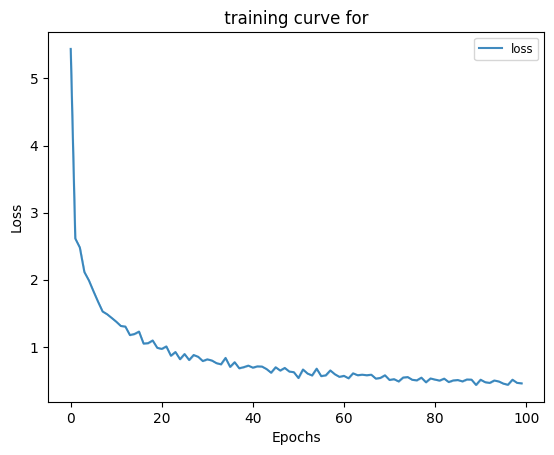

0.45586878061294556


In [7]:
hist = model.fit(x_train, y_train, epochs=100, verbose=0)
plot_train_test_loss([hist]);
print(hist.history["loss"][-1])

## 2. Ragged tensor

In [8]:
inputs = [
    {"shape": (None, 41), "name": "node_attributes", "dtype": "float32", "ragged": True},
    {"shape": (None, 11), "name": "edge_attributes", "dtype": "float32", "ragged": True},
    {"shape": (None, 2), "name": "edge_indices", "dtype": "int64", "ragged": True},
]
outputs = {"shape": (1, ), "name": "graph_labels", "dtype": "float32"}

In [9]:
model = make_model(
    inputs=inputs,
    input_tensor_type="ragged",
    output_mlp={"units": 1, "activation": "linear"}
)
model.compile(loss="mean_absolute_error")

INFO:kgcnn.models.utils:Updated model kwargs: '{'name': 'GINE', 'inputs': [{'shape': (None, 41), 'name': 'node_attributes', 'dtype': 'float32', 'ragged': True}, {'shape': (None, 11), 'name': 'edge_attributes', 'dtype': 'float32', 'ragged': True}, {'shape': (None, 2), 'name': 'edge_indices', 'dtype': 'int64', 'ragged': True}], 'input_tensor_type': 'ragged', 'cast_disjoint_kwargs': {}, 'input_embedding': None, 'input_node_embedding': {'input_dim': 95, 'output_dim': 64}, 'input_edge_embedding': {'input_dim': 10, 'output_dim': 64}, 'gin_mlp': {'units': [64, 64], 'use_bias': True, 'activation': ['relu', 'linear'], 'use_normalization': True, 'normalization_technique': 'graph_batch'}, 'gin_args': {'epsilon_learnable': False}, 'depth': 3, 'dropout': 0.0, 'verbose': 10, 'last_mlp': {'use_bias': [True, True, True], 'units': [64, 64, 64], 'activation': ['relu', 'relu', 'linear']}, 'output_embedding': 'graph', 'output_to_tensor': None, 'output_scaling': None, 'output_tensor_type': 'padded', 'outpu

In [10]:
x_train = dataset.tensor(inputs)
print(type(x_train[0]))
y_train = dataset.tensor(outputs)

<class 'tensorflow.python.ops.ragged.ragged_tensor.RaggedTensor'>


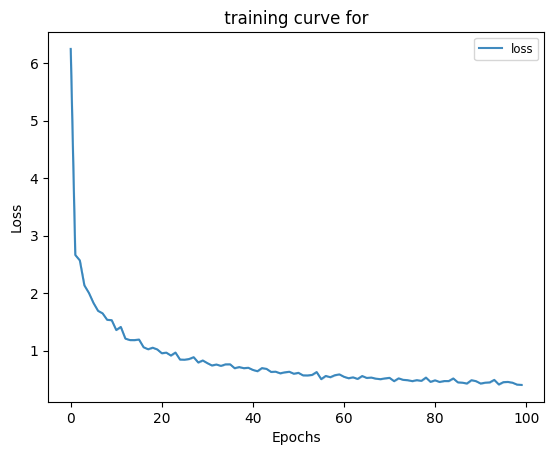

0.4058905243873596


In [11]:
hist = model.fit(x_train, y_train, epochs=100, verbose=0)
plot_train_test_loss([hist]);
print(hist.history["loss"][-1])

## 3. Disjoint input

In [12]:
inputs = [
    {"shape": (41, ), "name": "node_attributes", "dtype": "float32"},
    {"shape": (11, ), "name": "edge_attributes", "dtype": "float32"},
    {"shape": (None, ), "name": "edge_indices", "dtype": "int64"},  # shape is (2, None)
    {"shape": (), "name": "batch_id_node", "dtype": "int64"},
    {"shape": (), "name": "batch_id_edge", "dtype": "int64"},
    {"shape": (), "name": "node_id", "dtype": "int64"},
    {"shape": (), "name": "edge_id", "dtype": "int64"},
    {"shape": (), "name": "count_nodes", "dtype": "int64"},
    {"shape": (), "name": "count_edges", "dtype": "int64"},
]
outputs = {"shape": (1, ), "name": "graph_labels", "dtype": "float32"}

In [13]:
model = make_model(
    inputs=inputs,
    input_tensor_type="disjoint",
    output_mlp={"units": 1, "activation": "linear"}
)
model.compile(loss="mean_absolute_error")

INFO:kgcnn.models.utils:Updated model kwargs: '{'name': 'GINE', 'inputs': [{'shape': (41,), 'name': 'node_attributes', 'dtype': 'float32'}, {'shape': (11,), 'name': 'edge_attributes', 'dtype': 'float32'}, {'shape': (None,), 'name': 'edge_indices', 'dtype': 'int64'}, {'shape': (), 'name': 'batch_id_node', 'dtype': 'int64'}, {'shape': (), 'name': 'batch_id_edge', 'dtype': 'int64'}, {'shape': (), 'name': 'node_id', 'dtype': 'int64'}, {'shape': (), 'name': 'edge_id', 'dtype': 'int64'}, {'shape': (), 'name': 'count_nodes', 'dtype': 'int64'}, {'shape': (), 'name': 'count_edges', 'dtype': 'int64'}], 'input_tensor_type': 'disjoint', 'cast_disjoint_kwargs': {}, 'input_embedding': None, 'input_node_embedding': {'input_dim': 95, 'output_dim': 64}, 'input_edge_embedding': {'input_dim': 10, 'output_dim': 64}, 'gin_mlp': {'units': [64, 64], 'use_bias': True, 'activation': ['relu', 'linear'], 'use_normalization': True, 'normalization_technique': 'graph_batch'}, 'gin_args': {'epsilon_learnable': False

INFO:kgcnn.data.base:Dataloader is experimental and does not have all features for in and output.
C:\Users\patri\anaconda3\envs\gcnn_keras_test\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


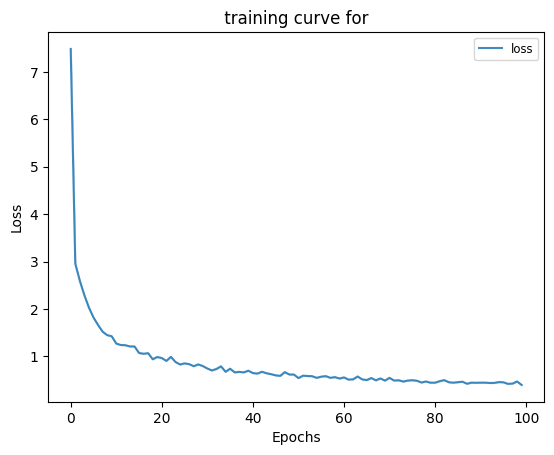

0.3954358696937561


In [14]:
dataloader = dataset.tf_disjoint_data_generator(
    inputs=inputs, 
    outputs=outputs, 
    batch_size=32, 
    assignment_to_id=[0, 1, 1],
    assignment_of_indices=[None, None, 0],
    pos_batch_id=[3,4],
    pos_subgraph_id=[5,6],
    pos_count=[7,8],
)
hist = model.fit(dataloader, epochs=100, verbose=0)
plot_train_test_loss([hist]);
print(hist.history["loss"][-1])